# Capstone 3 Preprocessing: Cluster Analysis on Customer Behavior

Preprocessing Steps:

Additional Cleaning: 
- There may be a further step of cleaning and wrangling some data by identify and handle missing values. 

Check for duplicates: 
- Identifying and removing any duplicate records in the dataset.

Address outliers: 
- Examine the data for outliers and decide whether to remove or transform them.

Feature Selection and Engineering:
- Choosing features that are likely to be informative for clustering, such as demographic information, purchase history, and customer behavior.

Creating new features: 
- Generate additional features that might enhance the clustering process, such as total spending or recency of purchases.

Data Transformation:
- Scale numerical features for clustering process

Encode categorical variables: 
- Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

Dimensionality Reduction (Possibility):

- Apply dimensionality reduction techniques such as Principal Component Analysis (PCA) to reduce the number of features and improve computational efficiency.

By performing these preprocessing steps, the data will be appropriately prepared for the clustering algorithms. Clean and standardized data will facilitate the clustering process, enabling the creation of meaningful customer segments. Effective preprocessing is essential for accurate and insightful customer segmentation, allowing businesses to tailor products and services to the distinct needs and behaviors of different customer groups.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

In [74]:
pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 488.9 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [27]:
df3 = pd.read_csv('EDA.csv')
df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Customer,Customer_For,Children,Income_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,2012-04-09,971,0,50k-70k
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,2014-08-03,125,2,30k-50k
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,2013-08-21,472,0,70k-100k
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,2014-10-02,65,1,0-30k
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,2014-01-19,321,1,50k-70k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,2013-06-13,541,1,50k-70k
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,2014-10-06,61,3,50k-70k
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,2014-01-25,315,0,50k-70k
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,2014-01-24,316,1,50k-70k


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
df3.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Date_Customer          0
Customer_For           0
Children               0
Income_Group           0
dtype: int64

Some Observations based on our current dataset:
- No Null Values
- Dt_Customer is properly turned into a date object from the previous step
- Categorical Variables are still in the dataset, so they will need to be properly encoded for further process and modeling

Dt_Customer will be used to create a new feature to indicate how long a customer has been registered.

In [31]:
df3["Dt_Customer"] = pd.to_datetime(df3["Dt_Customer"])
dates = []
for i in df3["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
    
print("Most recent customer enrollment date:",max(dates))
print("Oldest customer enrollment date:",min(dates))

Most recent customer enrollment date: 2014-12-06
Oldest customer enrollment date: 2012-01-08


We now know that the most recent is at the ned of 2014 and the oldest enrollment date is the beginning of 2012. 

In [34]:
# Calculating the difference between the newest date and each customer's registration date
newest_date = df3['Dt_Customer'].max()
df3['Customer_For'] = (newest_date - df3['Dt_Customer']) / pd.Timedelta(days=1)  # Dividing by Timedelta to get days

# Converting 'Customer_For' to numeric type
df3['Customer_For'] = pd.to_numeric(df3['Customer_For'], errors='coerce')

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [38]:
df3[["Date_Customer", "Customer_For"]].head()

,Date_Customer,Customer_For
0,2012-04-09,971.0
1,2014-08-03,125.0
2,2013-08-21,472.0
3,2014-10-02,65.0
4,2014-01-19,321.0


Great, the new feature has been created.
Let us take a look at the several unique categorical variables in the dataset.
For instance, the several categories for Marital Status and Education.

In [39]:
print("The unique categories from the features Education are:", df3["Education"].unique())

print("The unique categories from the features Marital Status are:", df3["Marital_Status"].unique())

The unique categories from the features Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
The unique categories from the features Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [42]:
df3["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [41]:
df3["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We will be wrangling some of these categories into proper forms so that they can be used for the clustering process. We will also need to take out some of the redundant features from the dataset and take care of outliers present. Here are the steps that will be taken in for feature engineering:

Age Calculation: We'll calculate the age of each customer by subtracting their birth year from the current year.

Total Spending: We'll create a new feature called "Spent" to represent the total amount spent by each customer 
across various product categories over a two-year period.

Living Situation: From the "Marital_Status" column, we'll derive a new feature called "Living_With" to indicate whether the customer is living with a partner, specifically focusing on couples.

Children Indicator: We'll create a new feature called "Children" to represent the total number of children in each household, including both kids and teenagers.

Family Size: For a clearer picture of household composition, we'll introduce a new feature called "Family_Size" to indicate the total number of individuals in each household.

Parenthood Status: We'll create a feature called "Is_Parent" to identify whether a customer is a parent or not.

Education Simplification: We'll simplify the "Education" column by categorizing the education levels into three broader categories to enhance clarity.

Redundant Features Dropping: We'll remove redundant features from the dataset to streamline and simplify the data for analysis.

Outliers: Finally, we will be dropping observations that are considered as outliers.

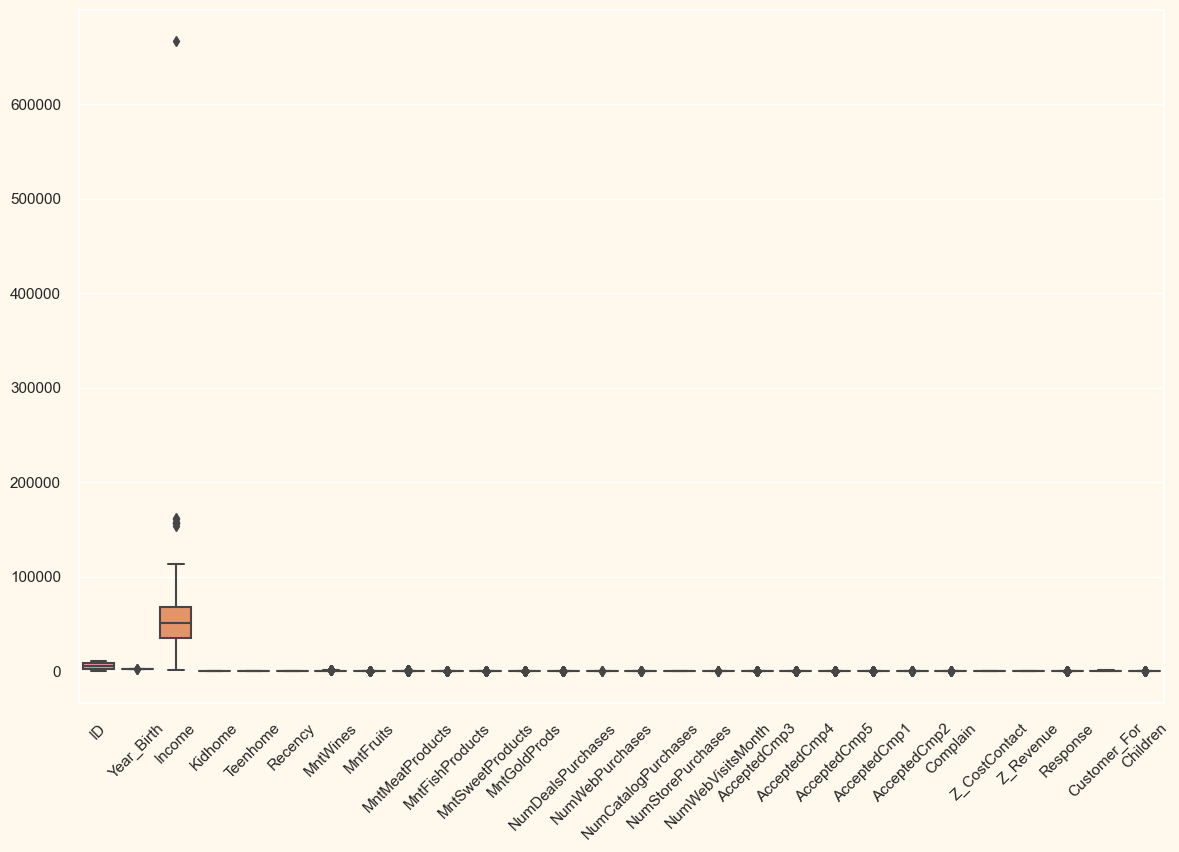

<Figure size 800x550 with 0 Axes>

In [111]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df3)
plt.xticks(rotation=45)
plt.show()
plt.savefig('clustering_income_outliers.png')

There seems to be an outlier in the "Income" column as one of the households earns over 600,000. We will be taking that out after some edits. We will make a copy of the new dataset in case we may need the old one.

In [47]:
df = df3.copy()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [52]:
# Calculating customer age based on their birth year (2015 is the publish date of dataset)
df['Age'] = 2015 - df['Year_Birth']

# Calculating total amount spent by each customer
df['Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculating the number of children in each household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Identifying parental status based on the presence of children
df['Parental Status'] = np.where(df['Children'] > 0, 1, 0)

# Mapping marital status categories to simplified ones
df['Marital_Status'].replace({"Married": "Couple", "Together": "Couple", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"}, inplace=True)

# Mapping education categories to simplified ones
df['Education'].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}, inplace=True)

# Calculating the total number of promotional campaigns accepted by each customer
df['Total Promo'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Renaming columns for clarity
df.rename(columns={"Marital_Status": "Marital Status", "MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold", "NumWebPurchases": "Web", "NumCatalogPurchases": "Catalog", "NumStorePurchases": "Store", "NumDealsPurchases": "Discount Purchases"}, inplace=True)

In [53]:
df.head()

,ID,Year_Birth,Education,Marital Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Date_Customer,Customer_For,Children,Income_Group,Age,Spending,Parental Status,Total Promo
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-04-09,58,635,...,11,1,2012-04-09,971.0,0,50k-70k,58,1617,0,0
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-08-03,38,11,...,11,0,2014-08-03,125.0,2,30k-50k,61,27,1,0
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,11,0,2013-08-21,472.0,0,70k-100k,50,776,0,0
3,6182,1984,Graduate,Couple,26646.0,1,0,2014-10-02,26,11,...,11,0,2014-10-02,65.0,1,0-30k,31,53,1,0
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,...,11,0,2014-01-19,321.0,1,50k-70k,34,422,1,0


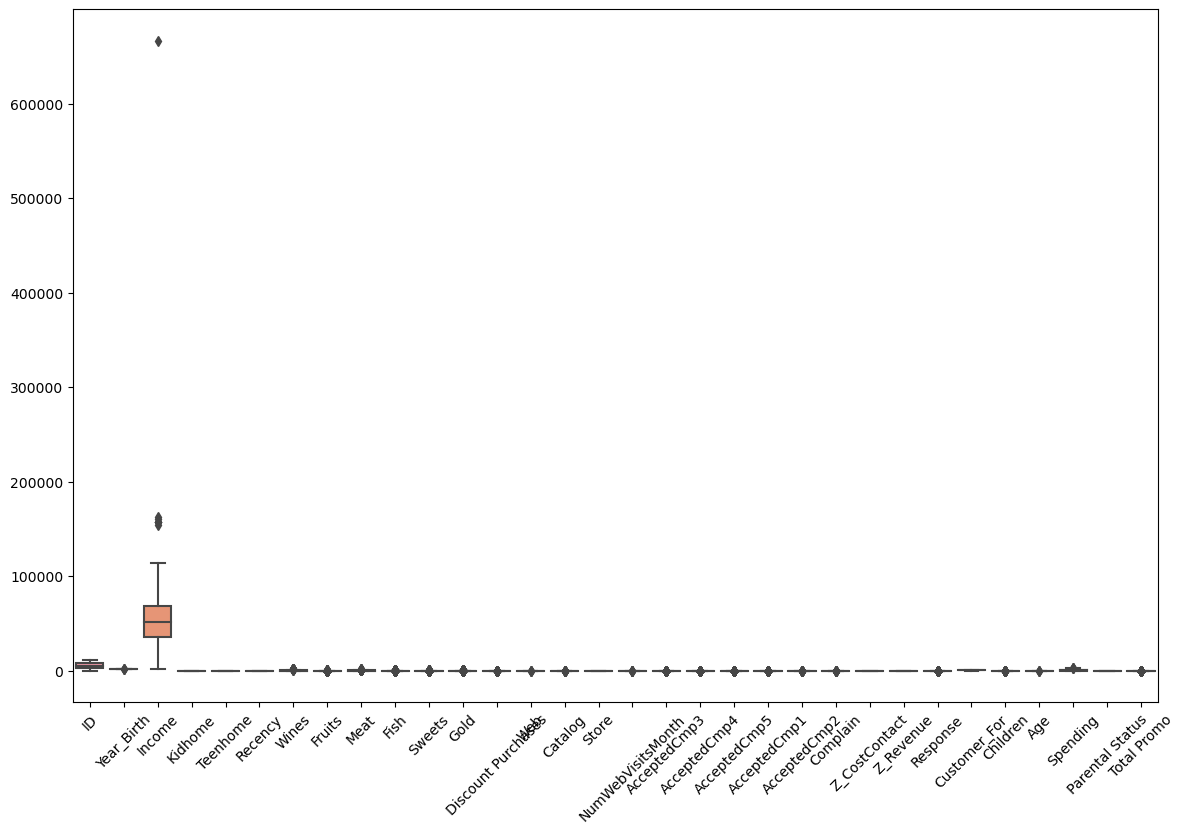

In [54]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [58]:
# Filtering out records with income greater than $600,000
df = df[df['Income'] < 600000]

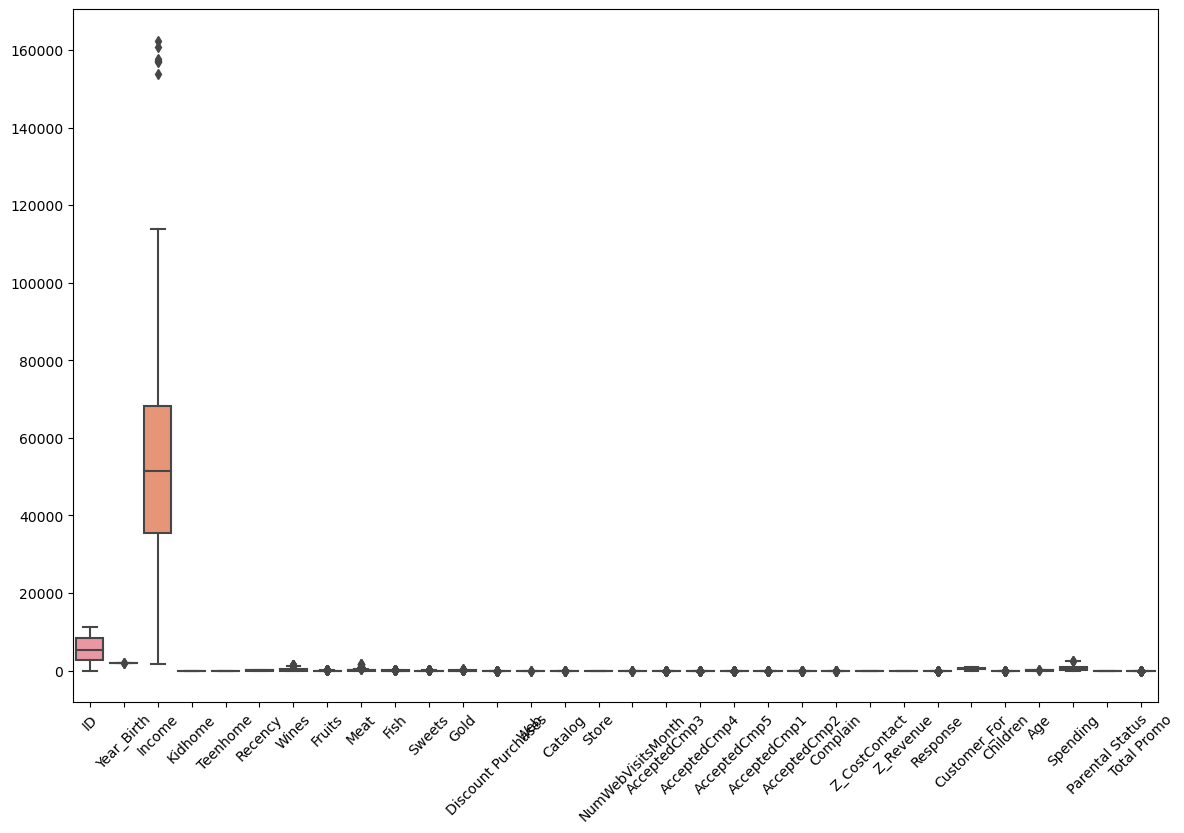

In [59]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [61]:
df["Total Promo"].value_counts()

0    1776
1     325
2      83
3      44
4      11
Name: Total Promo, dtype: int64

In [62]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "Income_Group", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
df = df.drop(to_drop, axis=1)

In [64]:
# Reordering and selecting relevant columns
df = df[['ID', 'Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Kidhome', 'Teenhome', 'Income', 'Spending', 'Customer_For', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2239 non-null   int64  
 1   Age                 2239 non-null   int64  
 2   Education           2239 non-null   object 
 3   Marital Status      2239 non-null   object 
 4   Parental Status     2239 non-null   int64  
 5   Children            2239 non-null   int64  
 6   Kidhome             2239 non-null   int64  
 7   Teenhome            2239 non-null   int64  
 8   Income              2239 non-null   float64
 9   Spending            2239 non-null   int64  
 10  Customer_For        2239 non-null   float64
 11  Recency             2239 non-null   int64  
 12  Wines               2239 non-null   int64  
 13  Fruits              2239 non-null   int64  
 14  Meat                2239 non-null   int64  
 15  Fish                2239 non-null   int64  
 16  Sweets

In [66]:
df.describe()

,ID,Age,Parental Status,Children,Kidhome,Teenhome,Income,Spending,Customer_For,Recency,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,46.197856,0.715051,0.950424,0.443948,0.506476,51963.554712,606.041090,511.973649,49.121036,...,167.016525,37.538633,27.074587,44.036177,4.085306,2.662796,5.791425,2.324252,0.297901,5.316213
std,3246.372471,11.985494,0.451491,0.751970,0.538390,0.544555,21410.672116,602.274089,232.258365,28.963662,...,225.743829,54.637617,41.286043,52.174700,2.779240,2.923542,3.251149,1.932345,0.678503,2.427144
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,38.000000,0.000000,0.000000,0.000000,0.000000,35533.500000,69.000000,340.500000,24.000000,...,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,0.000000,3.000000
50%,5455.000000,45.000000,1.000000,1.000000,0.000000,0.000000,51381.500000,396.000000,513.000000,49.000000,...,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,2.000000,0.000000,6.000000
75%,8423.500000,56.000000,1.000000,1.000000,1.000000,1.000000,68277.500000,1046.000000,685.500000,74.000000,...,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,3.000000,0.000000,7.000000
max,11191.000000,122.000000,1.000000,3.000000,2.000000,2.000000,162397.000000,2525.000000,1063.000000,99.000000,...,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,15.000000,4.000000,20.000000


The statistics provided indicate some inconsistencies between the average income and age, as well as the maximum income and age values.

In [69]:
df.rename(columns={'Customer_For': 'Customer For'}, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2239 non-null   int64  
 1   Age                 2239 non-null   int64  
 2   Education           2239 non-null   object 
 3   Marital Status      2239 non-null   object 
 4   Parental Status     2239 non-null   int64  
 5   Children            2239 non-null   int64  
 6   Kidhome             2239 non-null   int64  
 7   Teenhome            2239 non-null   int64  
 8   Income              2239 non-null   float64
 9   Spending            2239 non-null   int64  
 10  Customer For        2239 non-null   float64
 11  Recency             2239 non-null   int64  
 12  Wines               2239 non-null   int64  
 13  Fruits              2239 non-null   int64  
 14  Meat                2239 non-null   int64  
 15  Fish                2239 non-null   int64  
 16  Sweets

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

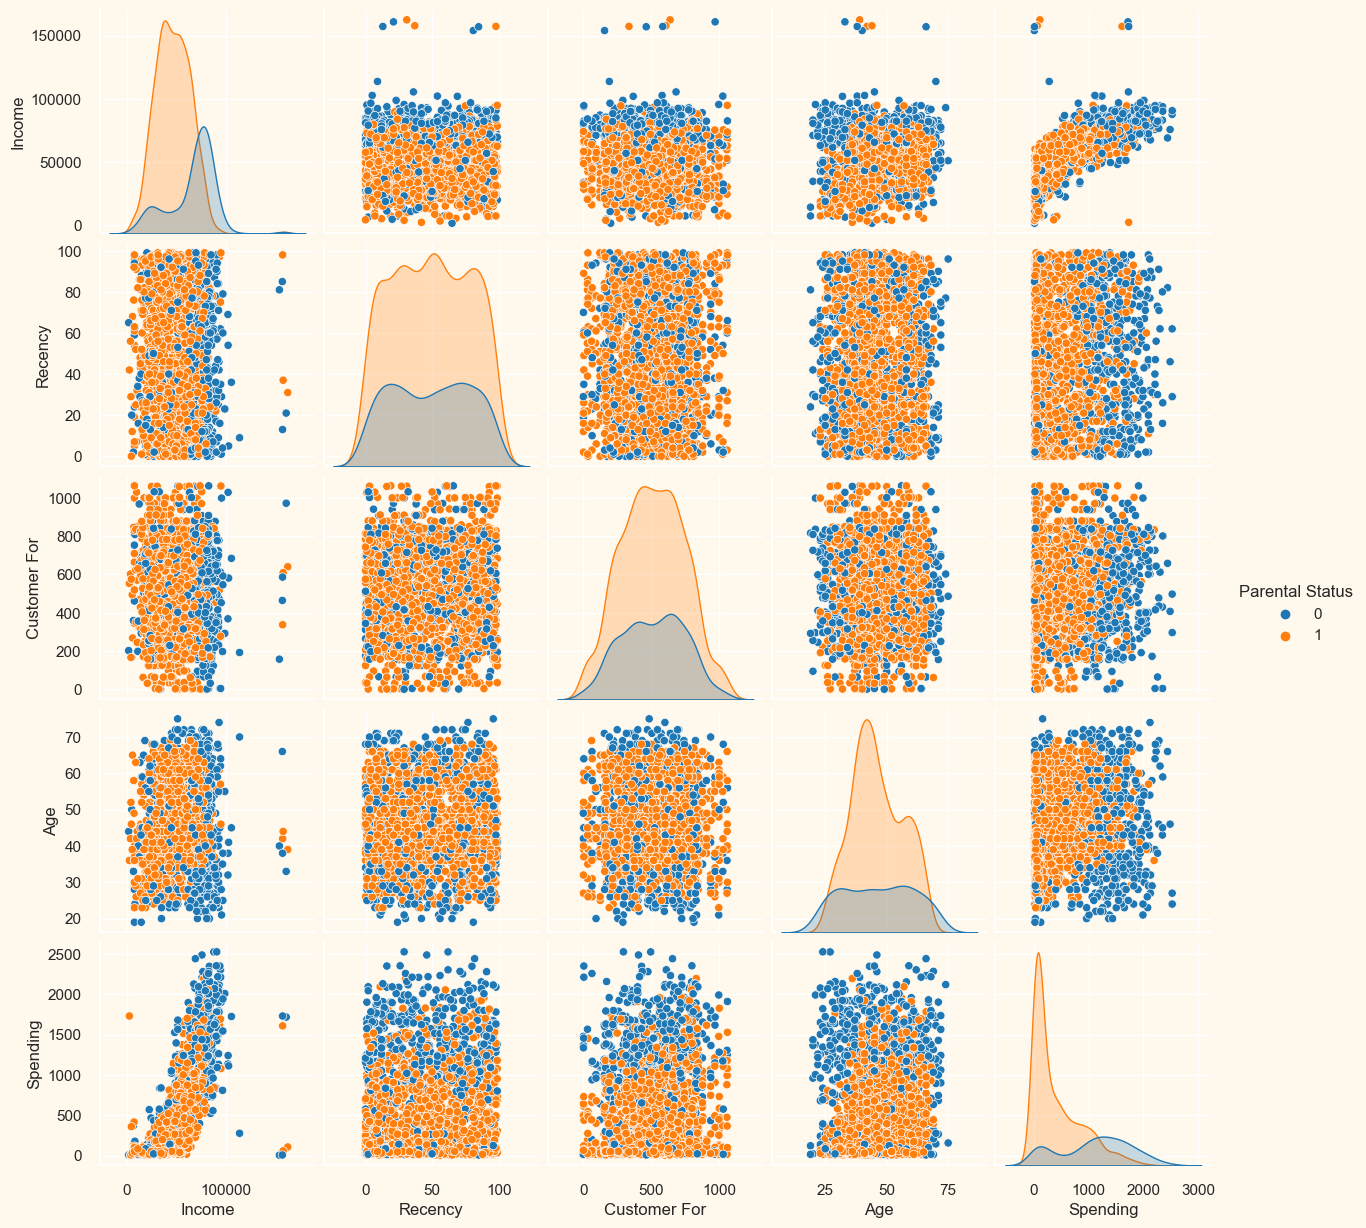

In [113]:
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Defining custom color palette
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
cmap = colors.ListedColormap(palette)

# Selecting features for plotting
features_to_plot = ["Income", "Recency", "Customer For", "Age", "Spending", "Parental Status"]

# Pair plotting with hue based on 'Parental Status'
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[features_to_plot], hue="Parental Status", palette=palette)
plt.savefig('parentalstatus.png')
plt.show()

We can see that the age column has some individuals with the age over 100, we will filter the data so that we will not include any observations over the age of 95:

In [84]:
df[df["Age"]>95]

,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spending,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
192,7829,115,Undergraduate,Alone,1,1,1,0,36640.0,65,...,8,7,4,25,2,1,2,1,0,5
239,11004,122,Undergraduate,Alone,1,1,0,1,60182.0,22,...,5,7,0,2,1,0,2,1,0,4
339,1150,116,Postgraduate,Couple,0,0,0,0,83532.0,1853,...,562,104,64,224,4,6,4,1,1,1


There are three, so we will be dropping those.

In [86]:
df = df[(df["Age"]<95)]
df[df["Age"]>95]

,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spending,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth


We will take a look at the correlation matrix:

<Axes: >

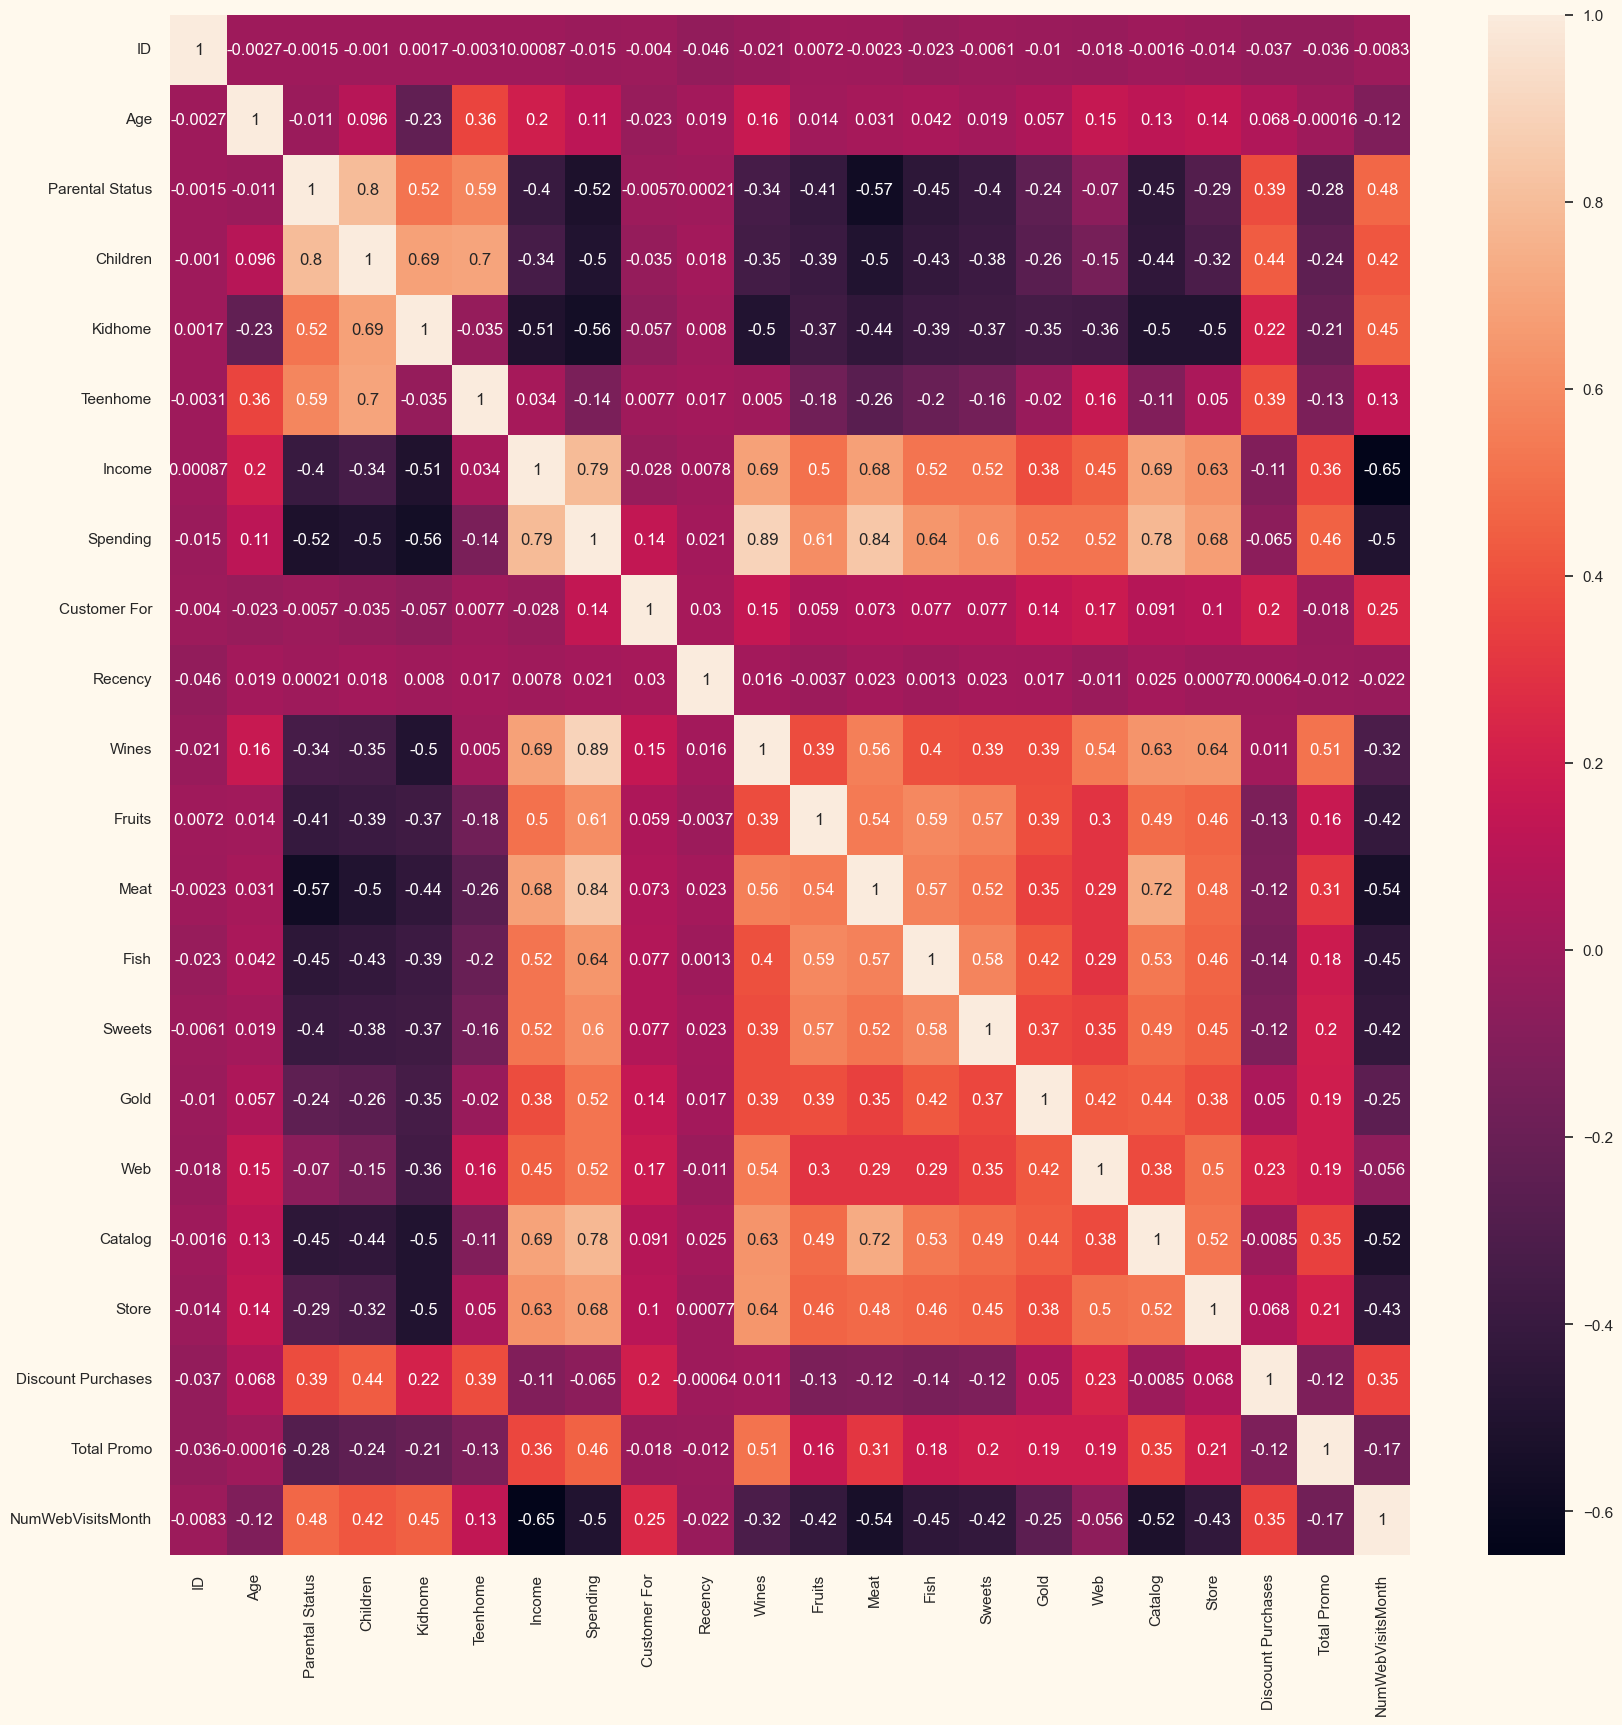

In [93]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)

In order to go through the clustering process, we first need to comprehend which categorical variables we are dealing with. 

In [94]:
data_types = df.dtypes

# Filtering columns with data type 'object' or 'category'
categorical_variables = data_types[data_types == 'object'].index.tolist() + data_types[data_types == 'category'].index.tolist()

# Display the list of categorical variables
print("Categorical variables:", categorical_variables)

Categorical variables: ['Education', 'Marital Status']


Label Encoding the object dtypes:

- We will apply the fit_transform() method of the LabelEncoder object directly to each column in object_cols using the apply() method.
- The lambda function applies the fit_transform() method to each column individually.
- This approach avoids the need for a loop and accomplishes the label encoding for all object-type columns in one line.

In [98]:
# Label Encoding the object dtypes.
LE = LabelEncoder()
for col in categorical_variables:
    df[col] = LE.fit_transform(df[col])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2236 non-null   int64  
 1   Age                 2236 non-null   int64  
 2   Education           2236 non-null   int64  
 3   Marital Status      2236 non-null   int64  
 4   Parental Status     2236 non-null   int64  
 5   Children            2236 non-null   int64  
 6   Kidhome             2236 non-null   int64  
 7   Teenhome            2236 non-null   int64  
 8   Income              2236 non-null   float64
 9   Spending            2236 non-null   int64  
 10  Customer For        2236 non-null   float64
 11  Recency             2236 non-null   int64  
 12  Wines               2236 non-null   int64  
 13  Fruits              2236 non-null   int64  
 14  Meat                2236 non-null   int64  
 15  Fish                2236 non-null   int64  
 16  Sweets

In [105]:
# Creating a copy of the original DataFrame excluding specified columns
cols_to_keep = [col for col in df.columns if col not in ['ID', 'Total Promo', 'Complain', 'Response']]
ds = df[cols_to_keep].copy()

# Scaling
scaler = StandardScaler()
scaled_ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

This code is creating a scaled version of the original DataFrame data with certain columns dropped, likely for further analysis or modeling purposes. It ensures that the data is on a similar scale across all features, which can be important for our upcoming algorithms and analyses.

In [106]:
scaled_ds.head()

,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spending,Customer For,...,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,NumWebVisitsMonth
0,1.016868,-0.89438,-1.347635,-1.584362,-1.264308,-0.824939,-0.930615,0.288947,1.680176,1.975467,...,1.554170,1.679746,2.461068,1.475396,0.845669,1.407639,2.509801,-0.552429,0.348738,0.692865
1,1.273264,-0.89438,-1.347635,0.631169,1.395139,1.032627,0.905974,-0.262003,-0.962202,-1.667017,...,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-1.110921,-0.568970,-1.167738,-0.168700,-0.131421
2,0.333146,-0.89438,0.742041,-1.584362,-1.264308,-0.824939,-0.930615,0.918423,0.282541,-0.172996,...,0.572177,-0.177201,1.344595,-0.147262,-0.038098,1.407639,-0.226884,1.293496,-0.686137,-0.543564
3,-1.290693,-0.89438,0.742041,0.631169,0.065416,1.032627,-0.930615,-1.182183,-0.918994,-1.925349,...,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.751127,-0.911056,-0.552429,-0.168700,0.280722
4,-1.034298,0.57070,0.742041,0.631169,0.065416,1.032627,-0.930615,0.296187,-0.305762,-0.823131,...,0.421101,-0.217088,0.154911,-0.001950,-0.556831,0.328256,0.115201,0.062879,1.383614,-0.131421


The ds dataframe is now scaled and ready for further modeling. We will save the two files for our next notebook.

In [107]:
df.to_csv('preprocessed_df.csv', index=False)

In [109]:
scaled_ds.to_csv('scaled_df.csv', index=False)